In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Smoking Data.csv')

In [4]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy()

In [8]:
for col in df.columns:
    if df1[col].dtype == np.object:
        df1[col] = le.fit_transform(df1[col])

In [12]:
df1.shape

(1338, 6)

In [16]:
df1.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

In [17]:
df1.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [18]:
x = df1.drop('smoker',axis=1)
y = df1['smoker']

In [19]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


In [20]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

# Breaking the dataset

In [43]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, train_size=.7, random_state = 42) #we use random state for using the smae data

# Model Training

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier(criterion = 'entropy')

In [65]:
clf.fit(xtrain,ytrain)
clf1.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
clf.score(xtrain, ytrain) # squard value

0.9989316239316239

In [61]:
clf.score(xtest, ytest) # squard value

0.6691542288557214

In [67]:
clf1.score(xtrain, ytrain) # squard value

0.9989316239316239

In [68]:
clf1.score(xtest, ytest) # squard value

0.6766169154228856

# Tree visualise

In [36]:
from sklearn import tree

In [40]:
x_features = x.columns

[Text(303.9742180658932, 638.73, 'sex <= 0.5\nentropy = 0.326\nsamples = 1338\nvalue = [1064, 274]'),
 Text(145.34469269921192, 611.5500000000001, 'bmi <= 22.995\nentropy = 0.287\nsamples = 662\nvalue = [547, 115]'),
 Text(29.610157618213663, 584.37, 'children <= 1.5\nentropy = 0.413\nsamples = 72\nvalue = [51, 21]'),
 Text(13.48581436077058, 557.19, 'bmi <= 21.61\nentropy = 0.343\nsamples = 50\nvalue = [39, 11]'),
 Text(7.036077057793346, 530.01, 'region <= 0.5\nentropy = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(4.690718038528897, 502.83000000000004, 'bmi <= 20.045\nentropy = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(2.3453590192644485, 475.65000000000003, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(7.036077057793346, 475.65000000000003, 'bmi <= 20.378\nentropy = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(4.690718038528897, 448.47, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(9.381436077057794, 448.47, 'age <= 28.0\nentropy = 0.5\nsamples = 2\nvalue = [1, 1]')

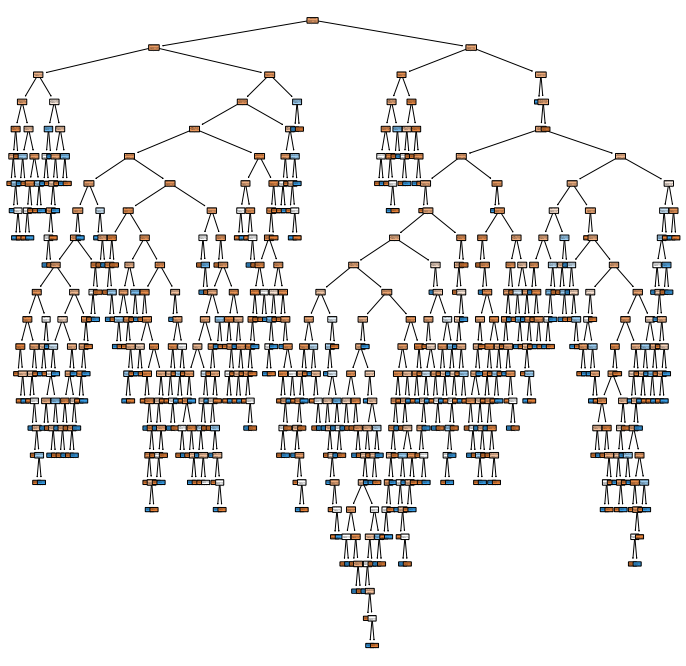

In [41]:
plt.figure(figsize=(12,12)) 
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x_features)